**ARIMA** **Prediction**

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from datetime import datetime
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import TimeseriesGenerator

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f79d200c9b0>,
      dtype=object)

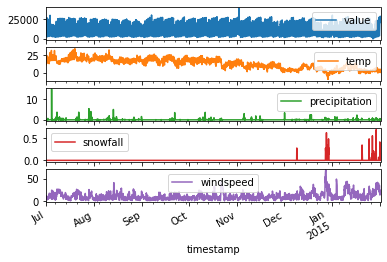

In [ ]:
data = pd.read_csv('nyc_taxi_3.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'], infer_datetime_format=True)
data.set_index('timestamp')[['value', 'temp', 'precipitation', 'snowfall', 'windspeed']].plot(subplots=True)

In [ ]:
data_input = data[['value', 'temp', 'precipitation', 'snowfall', 'windspeed']]

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
x = data_input.values 
                                                    
X, y = x[:,:5], x[:,0]                              
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=1, shuffle=False)

In [ ]:
from sklearn.preprocessing import StandardScaler   
scaler = StandardScaler() 
scaler.fit(x_train)
y_train = y_train.reshape(-1,1)
scaler.fit(y_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train_scaled = scaler.transform(y_train)
y_test_scaled = scaler.transform(y_test.reshape(-1,1))


In [ ]:
x_train_window = TimeseriesGenerator(x_train_scaled, y_train_scaled[:,0], length=168, sampling_rate=1, batch_size=1) 
x_test_window = TimeseriesGenerator(x_test_scaled, y_test_scaled[:,0], length=168, sampling_rate=1, batch_size=1)

In [ ]:
batch = x_train_window[0] 
x, y = batch

input_arr = []
output_arr = []
for batch in x_train_window:
  x, y = batch
  xr = x.ravel() 
  yr = y.ravel() 
  input_arr.append(xr)
  output_arr.append(yr)

In [ ]:
batch = x_test_window[0]
x, y = batch 

input_arr_test = []
output_arr_test = []
for batch in x_test_window:
  x, y = batch
  xr_test = x.ravel()
  yr_test = y.ravel()
  input_arr_test.append(xr_test)
  output_arr_test.append(yr_test)

In [ ]:
#80%
x_arr = np.array(input_arr)
y_arr = np.array(output_arr)
#20%
xr_test = np.array(input_arr_test)
yr_test = np.array(output_arr_test)


In [ ]:
model = LinearRegression().fit(x_arr,y_arr)

In [ ]:
y_pred = model.predict(xr_test) 
print(x_arr.shape)

y_pred_test = model.predict(xr_test) 
y_pred_test.shape

(3960, 840)


(864, 1)

In [ ]:
x_data = yr_test[:,:]
x_data.shape

(864, 1)

In [ ]:
data_pred = pd.concat([pd.DataFrame(y_pred_test), pd.DataFrame(xr_test)],axis=1)
data_pred

,0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839
0,0.058094,1.542125,-2.233333,-2.234746,-2.234746,-2.232116,1.108401,-2.233541,-2.234746,-2.234746,-2.232554,0.584530,-2.233645,-2.234746,-2.234746,-2.232676,-0.154385,-2.233709,-2.234746,-2.234746,-2.232929,-0.661244,-2.233855,-2.234746,-2.234746,-2.233162,-1.558934,-2.233795,-2.234746,-2.234746,-2.233006,-1.641520,-2.233955,-2.234746,-2.234746,-2.233172,-1.532035,-2.233955,-2.234746,-2.234746,...,0.016168,-2.234220,-2.234746,-2.234746,-2.232474,0.033034,-2.234383,-2.234746,-2.234746,-2.233006,0.195008,-2.234525,-2.234746,-2.234746,-2.233486,0.398856,-2.234624,-2.234746,-2.234746,-2.233653,-0.041119,-2.234701,-2.234746,-2.234746,-2.233626,-0.083285,-2.234745,-2.234746,-2.234746,-2.233739,0.036087,-2.234814,-2.234746,-2.234746,-2.233750,-0.073689,-2.234822,-2.234746,-2.234746,-2.233784
1,-0.145979,1.108401,-2.233541,-2.234746,-2.234746,-2.232554,0.584530,-2.233645,-2.234746,-2.234746,-2.232676,-0.154385,-2.233709,-2.234746,-2.234746,-2.232929,-0.661244,-2.233855,-2.234746,-2.234746,-2.233162,-1.558934,-2.233795,-2.234746,-2.234746,-2.233006,-1.641520,-2.233955,-2.234746,-2.234746,-2.233172,-1.532035,-2.233955,-2.234746,-2.234746,-2.232967,-1.134371,-2.234013,-2.234746,-2.234746,...,0.033034,-2.234383,-2.234746,-2.234746,-2.233006,0.195008,-2.234525,-2.234746,-2.234746,-2.233486,0.398856,-2.234624,-2.234746,-2.234746,-2.233653,-0.041119,-2.234701,-2.234746,-2.234746,-2.233626,-0.083285,-2.234745,-2.234746,-2.234746,-2.233739,0.036087,-2.234814,-2.234746,-2.234746,-2.233750,-0.073689,-2.234822,-2.234746,-2.234746,-2.233784,-0.286988,-2.234813,-2.234746,-2.234746,-2.233637
2,-0.543327,0.584530,-2.233645,-2.234746,-2.234746,-2.232676,-0.154385,-2.233709,-2.234746,-2.234746,-2.232929,-0.661244,-2.233855,-2.234746,-2.234746,-2.233162,-1.558934,-2.233795,-2.234746,-2.234746,-2.233006,-1.641520,-2.233955,-2.234746,-2.234746,-2.233172,-1.532035,-2.233955,-2.234746,-2.234746,-2.232967,-1.134371,-2.234013,-2.234746,-2.234746,-2.232999,-0.541436,-2.234035,-2.234746,-2.234746,...,0.195008,-2.234525,-2.234746,-2.234746,-2.233486,0.398856,-2.234624,-2.234746,-2.234746,-2.233653,-0.041119,-2.234701,-2.234746,-2.234746,-2.233626,-0.083285,-2.234745,-2.234746,-2.234746,-2.233739,0.036087,-2.234814,-2.234746,-2.234746,-2.233750,-0.073689,-2.234822,-2.234746,-2.234746,-2.233784,-0.286988,-2.234813,-2.234746,-2.234746,-2.233637,-0.592034,-2.234761,-2.234746,-2.234746,-2.233570
3,-1.024648,-0.154385,-2.233709,-2.234746,-2.234746,-2.232929,-0.661244,-2.233855,-2.234746,-2.234746,-2.233162,-1.558934,-2.233795,-2.234746,-2.234746,-2.233006,-1.641520,-2.233955,-2.234746,-2.234746,-2.233172,-1.532035,-2.233955,-2.234746,-2.234746,-2.232967,-1.134371,-2.234013,-2.234746,-2.234746,-2.232999,-0.541436,-2.234035,-2.234746,-2.234746,-2.232809,0.116783,-2.234006,-2.234746,-2.234746,...,0.398856,-2.234624,-2.234746,-2.234746,-2.233653,-0.041119,-2.234701,-2.234746,-2.234746,-2.233626,-0.083285,-2.234745,-2.234746,-2.234746,-2.233739,0.036087,-2.234814,-2.234746,-2.234746,-2.233750,-0.073689,-2.234822,-2.234746,-2.234746,-2.233784,-0.286988,-2.234813,-2.234746,-2.234746,-2.233637,-0.592034,-2.234761,-2.234746,-2.234746,-2.233570,-0.872653,-2.234697,-2.234746,-2.234746,-2.233425
4,-1.384345,-0.661244,-2.233855,-2.234746,-2.234746,-2.233162,-1.558934,-2.233795,-2.234746,-2.234746,-2.233006,-1.641520,-2.233955,-2.234746,-2.234746,-2.233172,-1.532035,-2.233955,-2.234746,-2.234746,-2.232967,-1.134371,-2.234013,-2.234746,-2.234746,-2.232999,-0.541436,-2.234035,-2.234746,-2.234746,-2.232809,0.116783,-2.234006,-2.234746,-2.234746,-2.232474,0.646034,-2.233971,-2.234746,-2.234746,...,-0.041119,-2.234701,-2.234746,-2.234746,-2.233626,-0.083285,-2.234745,-2.234746,-2.234746,-2.233739,0.036087,-2.234814,-

In [ ]:
rev_data=scaler.inverse_transform(xr_test)
rev_data.shape 

mse =np.mean(yr_test-y_pred_test)**2
print(mse)

def mean_absolute_percentage_error(xr_test, y_pred_test): 
    xr_test, y_pred_test = np.array(xr_test), np.array(y_pred_test)
    return np.mean(np.abs(y_pred_test - xr_test) / (np.abs(y_pred_test) + np.abs(xr_test))) * 100

mape = mean_absolute_percentage_error(xr_test, y_pred_test)

0.002361524673764555


In [ ]:
df_final = data_input[y_pred_test.shape[0]*-1:]

In [ ]:
df_final['Passenger_Pred_value'] = rev_data[:,0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_final

,value,temp,precipitation,snowfall,windspeed,Passenger_Pred_value
4296,13396,-0.459471,0.0,0.00,7.628263,25976.0
4297,11298,-0.099471,0.0,0.00,8.089993,22993.0
4298,9368,0.340529,0.0,0.00,9.085988,19390.0
4299,7493,0.900529,0.0,0.00,9.931042,14308.0
4300,5928,2.310529,0.0,0.00,11.659777,10822.0
...,...,...,...,...,...,...
5155,28804,2.700529,0.2,0.14,20.929596,26175.0
5156,24985,2.030528,0.0,0.00,20.880001,21243.0
5157,23719,1.660529,0.0,0.00,19.469976,20188.0
5158,25721,1.180529,0.0,0.00,15.379206,24357.0


11.289153920191788


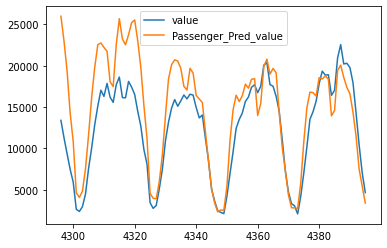

In [ ]:
df_final[['value','Passenger_Pred_value']][:100].plot()
arima_mape = mean_absolute_percentage_error(df_final.iloc[0:,0], df_final.iloc[0:,5])
print(arima_mape)

In [ ]:
df_final = pd.DataFrame(df_final, columns=['Passenger_Pred_value']).to_csv('prediction_ARIMA.csv')

**LSTM** **Prediction**

In [ ]:
df = pd.read_csv('nyc_taxi_3.csv')

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f79ccc9d8d0>,
      dtype=object)

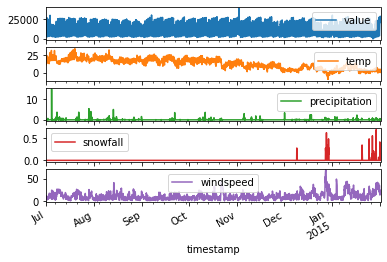

In [ ]:
df.set_index('timestamp')[['value', 'temp', 'precipitation', 'snowfall', 'windspeed']].plot(subplots=True)

In [ ]:
df_input = df[['value', 'temp', 'precipitation', 'snowfall', 'windspeed']]

In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_input)

In [ ]:
features = df_scaled
target = df_scaled[:,0]
features

array([[0.27650616, 0.54411425, 0.        , 0.        , 0.05912408],
       [0.1582587 , 0.52292097, 0.        , 0.        , 0.05912408],
       [0.09727219, 0.50886891, 0.        , 0.        , 0.04892014],
       ...,
       [0.60504223, 0.25132457, 0.        , 0.        , 0.28045014],
       [0.656128  , 0.2402672 , 0.        , 0.        , 0.22152572],
       [0.6783281 , 0.2252937 , 0.        , 0.        , 0.23836499]])

In [ ]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.27650616, 0.54411425, 0.        , 0.        , 0.05912408],
         [0.1582587 , 0.52292097, 0.        , 0.        , 0.05912408]]]),
 array([0.09727219]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123, shuffle=False)

In [ ]:
win_length = 168
batch_size = 32
num_features = 5
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=(win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))         # L1

model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))         # L2
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))               # L3
model.add(tf.keras.layers.Dense(1))

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
             optimizer=tf.optimizers.Adam(),
             metrics=[tf.metrics.MeanAbsolutePercentageError(), tf.metrics.MeanAbsoluteError()] )

history = model.fit_generator(train_generator, epochs=50,
                             validation_data=test_generator,
                             shuffle=False, callbacks=[early_stopping])

Epoch 1/50
124/124 [==============================] - 57s 463ms/step - loss: 0.0021 - mean_absolute_percentage_error: 13.1944 - mean_absolute_error: 0.0348 - val_loss: 0.0041 - val_mean_absolute_percentage_error: 225043.1875 - val_mean_absolute_error: 0.0474
Epoch 2/50
124/124 [==============================] - 56s 453ms/step - loss: 0.0019 - mean_absolute_percentage_error: 12.5294 - mean_absolute_error: 0.0330 - val_loss: 0.0035 - val_mean_absolute_percentage_error: 71638.0859 - val_mean_absolute_error: 0.0442
Epoch 3/50
124/124 [==============================] - 57s 456ms/step - loss: 0.0020 - mean_absolute_percentage_error: 13.2495 - mean_absolute_error: 0.0336 - val_loss: 0.0034 - val_mean_absolute_percentage_error: 130313.5625 - val_mean_absolute_error: 0.0443
Epoch 4/50
124/124 [==============================] - 57s 456ms/step - loss: 0.0018 - mean_absolute_percentage_error: 12.7330 - mean_absolute_error: 0.0330 - val_loss: 0.0037 - val_mean_absolute_percentage_error: 182331.8750

In [ ]:
model.evaluate_generator(test_generator, verbose=0)

[0.0038840954657644033, 25024.63671875, 0.045583464205265045]

In [ ]:
predictions = model.predict_generator(test_generator)

In [ ]:
test_win_length_after = x_test[:,1:][win_length:]

In [ ]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(test_win_length_after)],axis=1)

In [ ]:
rev_trans=scaler.inverse_transform(df_pred)

In [ ]:
df_final_LSTM = df_input[predictions.shape[0]*-1:]

In [ ]:
df_final_LSTM['Passenger_Pred_value'] = rev_trans[:,0]
df_final_LSTM


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,value,temp,precipitation,snowfall,windspeed,Passenger_Pred_value
4296,13396,-0.459471,0.0,0.00,7.628263,11568.247607
4297,11298,-0.099471,0.0,0.00,8.089993,9423.315751
4298,9368,0.340529,0.0,0.00,9.085988,7155.586697
4299,7493,0.900529,0.0,0.00,9.931042,5483.773526
4300,5928,2.310529,0.0,0.00,11.659777,4265.609761
...,...,...,...,...,...,...
5155,28804,2.700529,0.2,0.14,20.929596,24153.639814
5156,24985,2.030528,0.0,0.00,20.880001,24176.472713
5157,23719,1.660529,0.0,0.00,19.469976,23123.358689
5158,25721,1.180529,0.0,0.00,15.379206,24466.703967


9.65752769279476


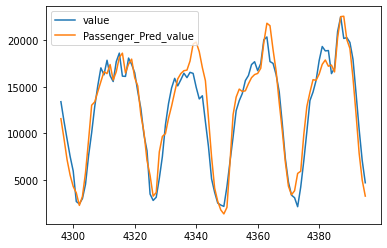

In [ ]:
df_final_LSTM[['value','Passenger_Pred_value']][:100].plot()
lstm_mape = mean_absolute_percentage_error(df_final_LSTM.iloc[0:,0], df_final_LSTM.iloc[0:,5])
print(lstm_mape)

Index(['Passenger_Pred_value', 0, 1, 2, 3, 4], dtype='object')


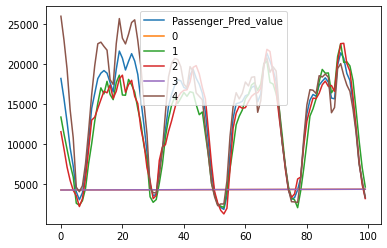

In [ ]:
df_final_LSTM = pd.DataFrame(df_final_LSTM, columns=['value', 'Passenger_Pred_value']).to_csv('prediction_LSTM_ARIMA.csv') ## one LSTM + Value

a = pd.read_csv("prediction_LSTM_ARIMA.csv")
b = pd.read_csv("prediction_ARIMA.csv")

weight_LSTM = arima_mape/(arima_mape+lstm_mape)
weight_ARIMA = lstm_mape/(arima_mape+lstm_mape)
weights_more = (weight_LSTM* a["Passenger_Pred_value"]) + (weight_ARIMA*b["Passenger_Pred_value"])

csv_file_list = ["prediction_LSTM_ARIMA.csv", "prediction_ARIMA.csv"]

list_of_dataframes = []
for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))
merged_df = pd.concat(list_of_dataframes, axis=1, ignore_index=True)

avg_merged_df = pd.concat([pd.DataFrame(weights_more), pd.DataFrame(merged_df)],axis= 1)
avg_merged_df.iloc[0:,0:][:100].plot()
print(avg_merged_df.columns)

In [ ]:
comb_mape = mean_absolute_percentage_error(avg_merged_df.iloc[0:,2], avg_merged_df.iloc[0:,0])
print(comb_mape)

9.14587491391986
